In [1]:
# Importing relevant libraries

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.datasets import fashion_mnist
from keras.callbacks import History
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

Using TensorFlow backend.


<hr>

### Convolutional Autoencoder
Designing a convolutional autoencoder to build image representatives.<br>
Later the **Fashion-MNIST** dataset is loaded from Keras for training.<br>
The generated model would be saved at the end for future use.

In [2]:
input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 16
x = MaxPooling2D((2, 2), padding='same')(x) #14 x 14 x 16
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x) #14 x 14 x 8
x = MaxPooling2D((2, 2), padding='same')(x) #7 x 7 x 8
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x) #7 x 7 x 8
encoded = MaxPooling2D((2, 2), padding='same')(x) #

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Pringint the summary of the desgined model.
print(autoencoder.summary())

# Loading the MNIST or Fashion-MNIST dataset from Keras
(x_train, _), (x_test, _) = fashion_mnist.load_data() # or alternatively: mnist.load_data()

# Normalizing train and test sets
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshaping the train and test sets
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

# Creating a History object to store the fitting history for post-processing (next block)
history = History()

# Fiting autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test), callbacks=[history])

# Saving the final model
autoencoder.save('C:\\Users\\kaveh.bakhtiyari\\JupyterProjects\\ImageSearch-ACE\\Models\\autoen_mnist.h5')
#del autoencoder








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________

<hr>

#### Model Visualization

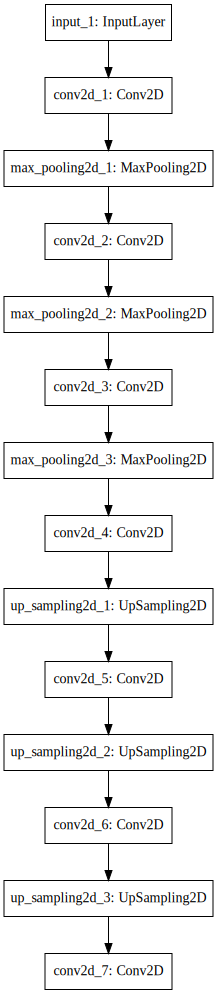

In [7]:
# loading model
from keras.models import load_model
autoencoder = load_model('C:\\Users\\kaveh.bakhtiyari\\JupyterProjects\\ImageSearch-ACE\\Models\\autoen_mnist.h5')

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# visualizing the model and storing it in a file
from keras.utils import plot_model
plot_model(autoencoder, to_file='C:\\Users\\kaveh.bakhtiyari\\JupyterProjects\\ImageSearch-ACE\\Models\\autoen_mnist.png', show_shapes=True, show_layer_names=True)

# showing the visualization on IPython
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))

<hr>

### Performance Restuls:
The performance of the model based on the **Loss** and **Val_Loss** is ploted.<br>
The model was tested based on the various types of neutwork, by extending the network (going deeper), but the performance did not change significantly.

In our tests, this model was smallest and fastest which could converge relatevely within 40 epochs.

dict_keys(['val_loss', 'loss'])
val_loss [0.33514001960754397, 0.32091846108436584, 0.31422475905418396, 0.31044713621139525, 0.3028158946990967, 0.30673124041557315, 0.3026013590812683, 0.2976906532764435, 0.30040417757034305, 0.30178253059387206, 0.2962487493515015, 0.29509407262802123, 0.2971960748672485, 0.29667415657043456, 0.29506948747634887, 0.2980634527683258, 0.2934183897972107, 0.2935616807937622, 0.2918580572605133, 0.29272004189491274, 0.29215500159263613, 0.29194676485061644, 0.2908925989151001, 0.28894782319068907, 0.2913294600009918, 0.2917046696662903, 0.29307877259254456, 0.2908782099246979, 0.289914054775238, 0.29235145797729495, 0.2869948215484619, 0.28983615770339966, 0.291167999792099, 0.2906444716930389, 0.28721711463928223, 0.28668673849105836, 0.2897115137577057, 0.2874403503417969, 0.28984299302101135, 0.2888374361038208, 0.28666220326423647, 0.28747766070365904, 0.2852246385574341, 0.2847781762123108, 0.28769585518836976, 0.2868647288322449, 0.288693065166473

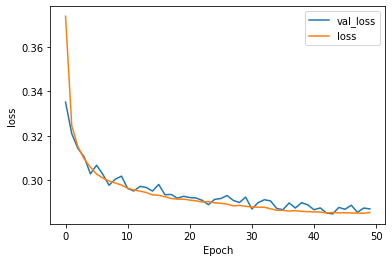

In [3]:
#print(history.history.keys())

# Plotting Loss and Val_Loss parameters of the trained model
for index, key in enumerate(history.history.keys()):
    #print(key, history.history[key])
    plt.plot(history.history[key], label=key)

plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(loc='upper right')
plt.show()

### Loading and Building the Feature Images

The generated model would be applied on the **Test Set**.<br>
Then a sample of 10 images are ploted along with the originals and reconstructed-images to check how the model worked visually.

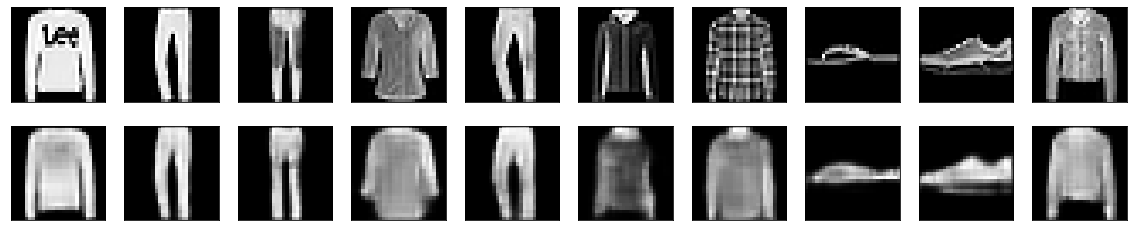

In [4]:
# loading the saved model (if required)
#from keras.models import load_model
#autoencoder = load_model('C:\\Users\\kaveh.bakhtiyari\\JupyterProjects\\ImageSearch-ACE\\Models\\autoen_mnist.h5')

# Generating the eigen-features (reconstructed images) for all images within test set
decoded_imgs = autoencoder.predict(x_test)

# Plotting n sample of images/eigen-features from test set
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    i = i + 1
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


### Query (Nearest Neighbors)

At this stage, decoded images are reshaped to a linear array for calculating the distance.<br>
Then, a sample image from **Test Set** is selected, and its similarity distance is calculated against all the reconstructed images in the dataset.<br>
The closest items (*n_neighbors*) are extracted to be ploted as the most *n* similar products.

In [5]:
# Fit the NN algorithm to the encoded test set
x_t = np.zeros((10000,784))
for i in range(len(decoded_imgs)):
    x_t[i] = decoded_imgs[i].reshape(784)

nbrs = NearestNeighbors(n_neighbors=20).fit(x_t)

sample_image = 7000 #from 10,000 images
query_image = np.zeros((1,784))
query_image[0] = np.array(decoded_imgs[sample_image].reshape(784))
#np.array(query_code)

#print (query_image.shape)
# Find the closest images to the encoded query image
distances, indices = nbrs.kneighbors(query_image)
print("Distances:", distances)
print("Indices:", indices)

Distances: [[0.         2.4437937  2.52387826 2.59864231 2.70887102 2.85735219
  2.88938882 2.99030703 3.24854637 3.30940758 3.41157554 3.46716516
  3.49210414 3.5090928  3.52399999 3.55538067 3.66897117 3.73527594
  3.73961228 3.75338005]]
Indices: [[7000 8055 8449 3212 5573 4318 5878 9586 6624  492 1639 9688 9301 8380
  5559 2789 8844 6366 6457 8284]]


In [ ]:
<hr>

### Visualizing

When the similar eigen-features are found, the actual product of those features are ploted.<br>
In this section, the followings are ploted:
* Original Image: The original queried image,
* Queried Image: The eigen-feature image of the queried image,
* Original Images of similar products to our query.

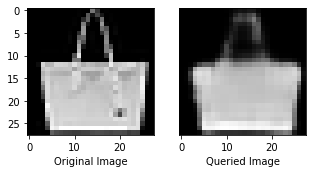

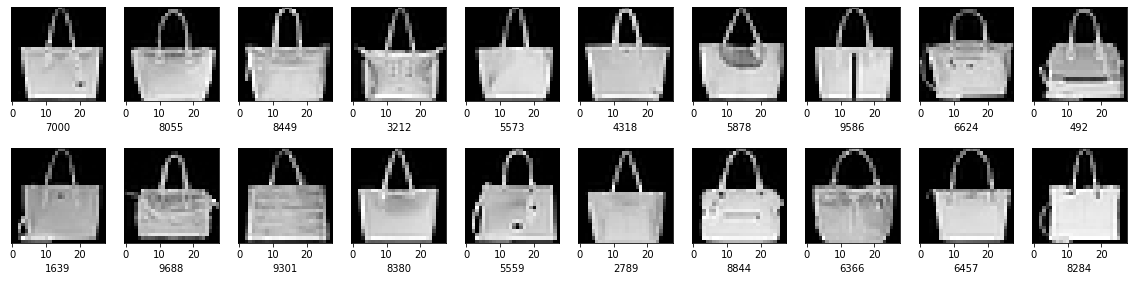

In [6]:
# Plotting the original image
plt.figure(figsize=(5, 2))
ax = plt.subplot(1, 2, 1)
plt.subplots_adjust(bottom=0.1, top=1)
plt.imshow(x_test[sample_image].reshape(28, 28))
plt.xlabel("Original Image")

# Plotting the constructed image of the original image
ax = plt.subplot(1, 2, 2)
plt.imshow(decoded_imgs[sample_image].reshape(28, 28))
plt.gray()
plt.xlabel("Queried Image")
ax.get_yaxis().set_visible(False)
plt.show()

# Plotting the n origianl images which are found to be the nearest within the test-set
n = 20
plt.figure(figsize=(20, 4))
j = 0
for index, value in enumerate(indices[0]):
    # display original from test set
    j = j + 1
    ax = plt.subplot(int(n/10), 10, j)
    plt.subplots_adjust(bottom=0.1, top=1)
    plt.imshow(x_test[value].reshape(28, 28))
    plt.gray()
    plt.xlabel(value)
    ax.get_yaxis().set_visible(False)
plt.show()
